# ICL evluation beased on LongBench

In [41]:
import os
import pandas as pd

folder_path = "/Users/lujun.li/projects/causallm-github/temperature_eval/Paper Experiment Results/New_filtered/ICL"

dfs = []

for file_name in os.listdir(folder_path):
    if file_name.endswith("evaluated.csv"):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

merged_df["Temperature"] = merged_df["Temperature"].round(1).astype(float)

In [42]:
merged_df.dataset_name.value_counts()

dataset_name
trec        3920
triviaqa    3185
Name: count, dtype: int64

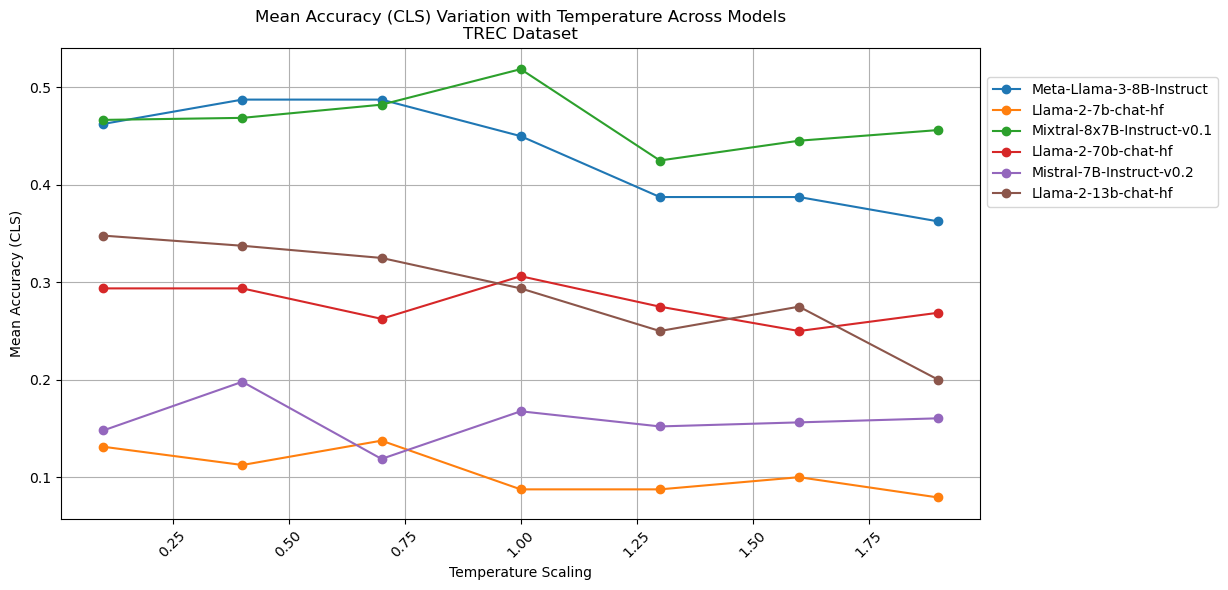

In [43]:
import matplotlib.pyplot as plt

trec_df = merged_df[merged_df["dataset_name"] == "trec"]
grouped_data = trec_df.groupby(["model", "Temperature"])["classification_score"].mean()

models = trec_df["model"].unique()

plt.figure(figsize=(10, 6))
for model in models:
    model_data = grouped_data[model]
    plt.plot(
        model_data.index.get_level_values("Temperature"),
        model_data,
        marker="o",
        label=model,
    )

plt.xlabel("Temperature Scaling")
plt.ylabel("Mean Accuracy (CLS)")
plt.title("Mean Accuracy (CLS) Variation with Temperature Across Models\nTREC Dataset")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.legend(loc="center left", bbox_to_anchor=(1, 0.8))

plt.show()

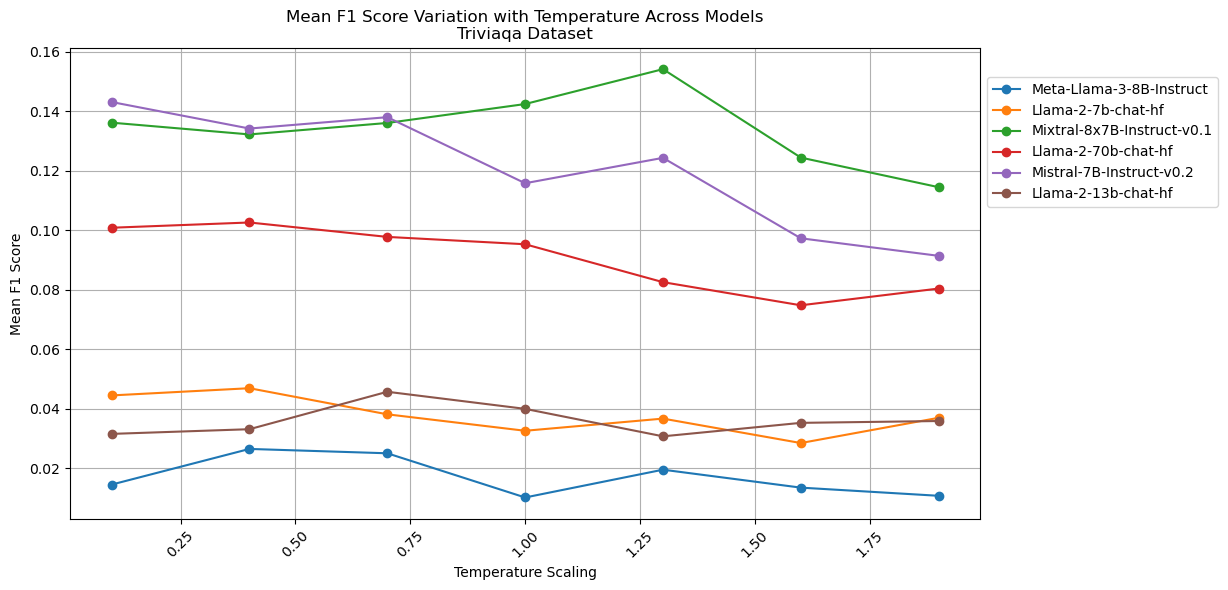

In [44]:
import matplotlib.pyplot as plt

triviaqa_df = merged_df[merged_df["dataset_name"] == "triviaqa"]
grouped_data = triviaqa_df.groupby(["model", "Temperature"])["qa_f1_score"].mean()

models = triviaqa_df["model"].unique()

plt.figure(figsize=(10, 6))
for model in models:
    model_data = grouped_data[model]
    plt.plot(
        model_data.index.get_level_values("Temperature"),
        model_data,
        marker="o",
        label=model,
    )

plt.xlabel("Temperature Scaling")
plt.ylabel("Mean F1 Score")
plt.title("Mean F1 Score Variation with Temperature Across Models\nTriviaqa Dataset")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.legend(loc="center left", bbox_to_anchor=(1, 0.8))

plt.show()